### ___Importing Libraries___

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import re
import os

import missingno as msno

# Implementation of SimpleImputer using Python
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input/telecom-churn-datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# We can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# We can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-datasets/data_dictionary.csv
/kaggle/input/telecom-churn-datasets/train.csv
/kaggle/input/telecom-churn-datasets/test.csv


### ___Assiging the Dataset to the .csv files___

In [3]:
data_dictionary = pd.read_csv('/kaggle/input/telecom-churn-datasets/data_dictionary.csv')
test_df = pd.read_csv('/kaggle/input/telecom-churn-datasets/train.csv')
unseen_df = pd.read_csv('/kaggle/input/telecom-churn-datasets/test.csv')

UNderstanding the dictionary to have an overlook of the data avalible for analysis of the out come

In [4]:
print(data_dictionary.shape)
print(test_df.shape)
print(unseen_df.shape)

(36, 2)
(69999, 172)
(30000, 171)


In [5]:
data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [6]:
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [7]:
unseen_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [8]:
# Identifying key variables based on descriptions
ids = ['id', 'circle_id']

# Adding revenue and amount-related variables
total_amounts = [i for i in list(test_df.columns) if re.search('total.+amt', i)]
recharge_amounts = [i for i in list(test_df.columns) if re.search('rech.+amt', i)]
vbc_costs = [i for i in list(test_df.columns) if re.search('vbc', i)]
arpu_values = [i for i in list(test_df.columns) if re.search('arpu', i)]

# Call usage variables
total_outgoing_minutes = [i for i in list(test_df.columns) if re.search('total.+og.+mou', i)]
incoming_minutes = [i for i in list(test_df.columns) if re.search('ic.+mou', i)]
roaming_minutes = [i for i in list(test_df.columns) if re.search('roam.+mou', i)]
special_call_minutes = [i for i in list(test_df.columns) if re.search('spl.+mou', i)]
isd_call_minutes = [i for i in list(test_df.columns) if re.search('isd.+mou', i)]

# On-net and off-net variables
onnet_minutes = [i for i in list(test_df.columns) if re.search('onnet.+mou', i)]
offnetwork_minutes = [i for i in list(test_df.columns) if re.search('offnet.+mou', i)]

# Internet usage variables
volume_3g = [i for i in list(test_df.columns) if re.search('vol.+3g', i)]
volume_2g = [i for i in list(test_df.columns) if re.search('vol.+2g', i)]
average_revenue_3g = [i for i in list(test_df.columns) if re.search('arpu.+3g', i)]
average_revenue_2g = [i for i in list(test_df.columns) if re.search('arpu.+2g', i)]

# Age and scheme-related variables
age_on_network = [i for i in list(test_df.columns) if re.search('aon', i)]
night_usage = [i for i in list(test_df.columns) if re.search('night', i)]
monthly_schemes = [i for i in list(test_df.columns) if re.search('monthly', i)]
sachet_schemes = [i for i in list(test_df.columns) if re.search('sachet', i)]
fb_user = [i for i in list(test_df.columns) if re.search('fb_user', i)]

# Call type-specific usage
t2t_calls = [i for i in list(test_df.columns) if re.search('t2t', i)]
t2m_calls = [i for i in list(test_df.columns) if re.search('t2m', i)]
t2o_calls = [i for i in list(test_df.columns) if re.search('t2o', i)]
t2f_calls = [i for i in list(test_df.columns) if re.search('t2f', i)]
t2c_calls = [i for i in list(test_df.columns) if re.search('t2c', i)]

# KPIs for specific months
monthly_kpis = [i for i in list(test_df.columns) if re.search(r'\.\d+', i)]

# Storing them in a single flat list
variables = [
    *ids,
    *total_amounts,
    *recharge_amounts,
    *vbc_costs,
    *arpu_values,
    *total_outgoing_minutes,
    *incoming_minutes,
    *roaming_minutes,
    *special_call_minutes,
    *isd_call_minutes,
    *onnet_minutes,
    *offnetwork_minutes,
    *volume_3g,
    *volume_2g,
    *average_revenue_3g,
    *average_revenue_2g,
    *age_on_network,
    *night_usage,
    *monthly_schemes,
    *sachet_schemes,
    *fb_user,
    *t2t_calls,
    *t2m_calls,
    *t2o_calls,
    *t2f_calls,
    *t2c_calls,
    *monthly_kpis,
    'churn_probability'
]

# Selecting the relevant subset of data
data = test_df[variables].set_index('id')


In [9]:
data

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,...,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,77,65,10,77,65,10,65,65,10,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0
1,109,0,145,50,0,145,50,0,145,50,...,0.0,0.0,0.00,0.00,22.01,29.79,0.0,0.0,0.0,0
2,109,70,120,0,70,120,0,70,70,0,...,0.0,0.0,0.00,2.14,0.00,0.00,0.0,0.0,0.0,0
3,109,160,240,130,160,240,130,110,110,50,...,0.0,0.0,0.00,0.00,0.00,8.03,0.0,0.0,0.0,0
4,109,290,136,122,290,136,122,50,41,30,...,0.0,0.0,0.00,0.00,9.85,0.00,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,109,50,397,512,50,397,512,50,110,130,...,0.0,0.0,0.00,0.00,2.43,0.86,0.0,0.0,0.0,0
69995,109,200,313,308,200,313,308,90,44,44,...,0.0,0.0,0.00,0.00,4.01,0.00,0.0,0.0,0.0,0
69996,109,626,250,397,626,250,397,279,250,349,...,2.5,0.0,2.48,0.00,4.10,0.00,0.0,0.0,0.0,0


In [10]:
data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column              Dtype  
---   ------              -----  
 0    circle_id           int64  
 1    total_rech_amt_6    int64  
 2    total_rech_amt_7    int64  
 3    total_rech_amt_8    int64  
 4    total_rech_amt_6    int64  
 5    total_rech_amt_7    int64  
 6    total_rech_amt_8    int64  
 7    max_rech_amt_6      int64  
 8    max_rech_amt_7      int64  
 9    max_rech_amt_8      int64  
 10   av_rech_amt_data_6  float64
 11   av_rech_amt_data_7  float64
 12   av_rech_amt_data_8  float64
 13   aug_vbc_3g          float64
 14   jul_vbc_3g          float64
 15   jun_vbc_3g          float64
 16   arpu_6              float64
 17   arpu_7              float64
 18   arpu_8              float64
 19   arpu_3g_6           float64
 20   arpu_3g_7           float64
 21   arpu_3g_8           float64
 22   arpu_2g_6           float64
 23   arpu_2g_7           float64
 24   arpu_

### New Features and Insights
#### Roaming and Special Call Minutes:
Investigate whether high roaming or special call usage impacts churn.
Analyze user clusters based on roaming and SPL usage.

#### Social Media Scheme (FB_USER):
Determine if social media scheme users churn less due to dependency.
Compare FB_USER adoption rates and churn behavior.

#### Night, Monthly, and Sachet Schemes:
Check if short-term (SACHET) or specific time-based (NIGHT) schemes are more prone to churn.
Conduct a time-series analysis of churn by scheme type.

#### Call Types (T2T, T2M, T2O, etc.):
Analyze whether certain call types (e.g., T2M or T2F) correlate with churn due to cost or quality issues.

#### Monthly KPIs:
Correlate monthly KPIs with churn trends to identify service-level impacts.

In [11]:
data.describe(include='all')

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,...,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,churn_probability
count,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,69999.000000
mean,109.0,328.139788,322.376363,323.846355,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,...,2.146273,2.199395,2.075179,1.126025,1.361052,1.420840,0.0,0.0,0.0,0.101887
std,0.0,404.211068,411.070120,426.181405,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,...,16.522232,16.171533,15.865403,5.741811,7.914113,6.542202,0.0,0.0,0.0,0.302502
min,109.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,109.0,110.000000,100.000000,90.000000,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,109.0,229.000000,220.000000,225.000000,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,109.0,438.000000,430.000000,436.000000,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
max,109.0,35190.000000,40335.000000,45320.000000,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,...,1351.110000,1136.080000,1394.890000,342.860000,916.240000,351.830000,0.0,0.0,0.0,1.000000


## Creating X and Y dataset 
Skipping 'circle_id' as it has only one unique value 

In [12]:
X = data.drop(['circle_id'], axis = 1).iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 170), (69999,))

Considering the Tranning data, and dividing it into Test and validations to say for better handeling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 170), (14000, 170), (55999,), (14000,))

## Handeling Missing Values 

Analysing the new data for missing values using missingno Library

<Axes: >

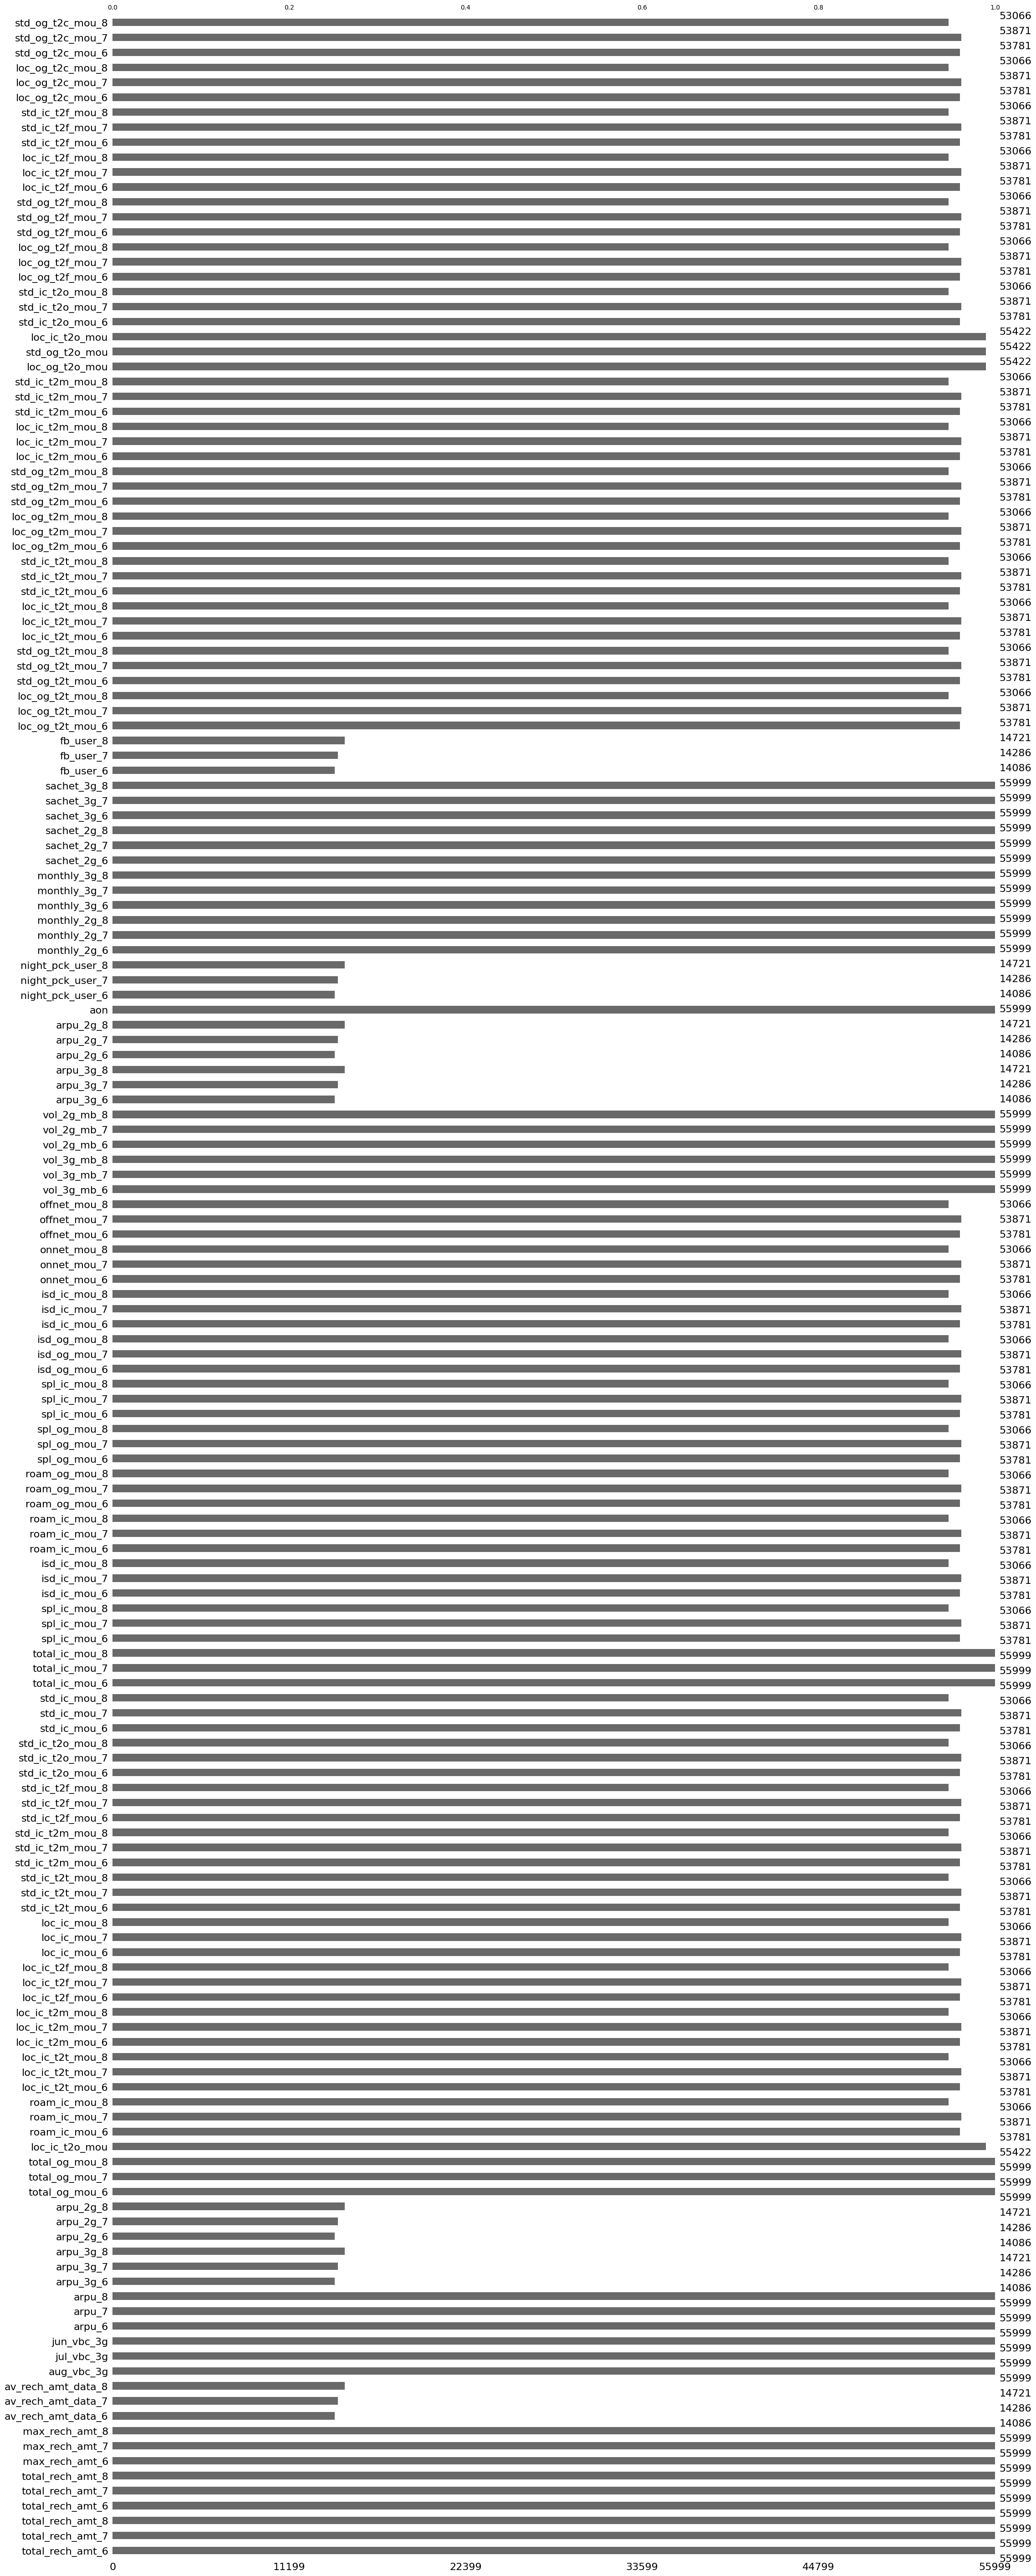

In [14]:
msno.bar(X_train)

<Axes: >

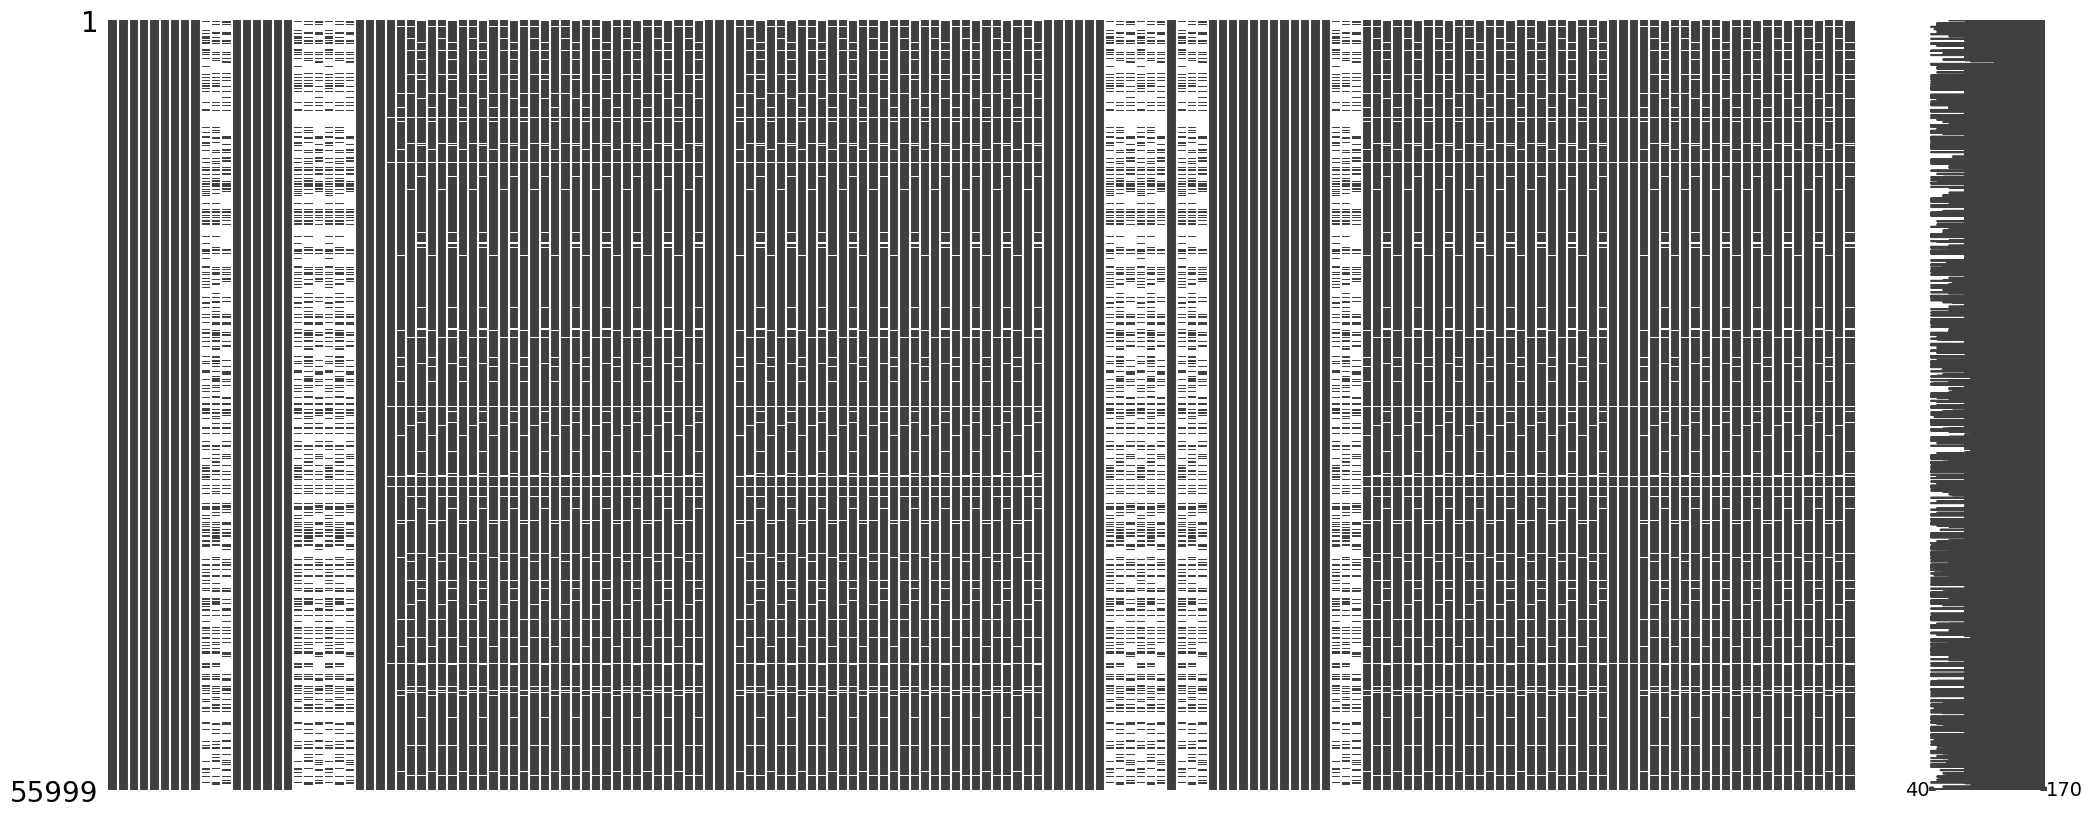

In [15]:
msno.matrix(X_train)

In [16]:
# Calculating the Missing Percentage values

missing_data_percent = 100*(X_train.isnull().sum()/len(y_train))
missing_data_percent

total_rech_amt_6    0.000000
total_rech_amt_7    0.000000
total_rech_amt_8    0.000000
total_rech_amt_6    0.000000
total_rech_amt_7    0.000000
                      ...   
loc_og_t2c_mou_7    3.800068
loc_og_t2c_mou_8    5.237594
std_og_t2c_mou_6    3.960785
std_og_t2c_mou_7    3.800068
std_og_t2c_mou_8    5.237594
Length: 170, dtype: float64

In [17]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index # checks for columns with missing data percentages less than or equal to 40% (le stands for "less than or equal").
new_vars

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'aug_vbc_3g',
       ...
       'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8'],
      dtype='object', length=149)

In [18]:
# Drop columns not in `new_vars`
X_train_filtered = X_train.drop(columns=[col for col in X_train.columns if col not in new_vars])

# Check shapes
X_train_filtered.shape, X_train.shape


((55999, 149), (55999, 170))

In [19]:
X_train_filtered.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Index: 55999 entries, 47338 to 15795
Data columns (total 149 columns):
 #    Column            Dtype  
---   ------            -----  
 0    total_rech_amt_6  int64  
 1    total_rech_amt_7  int64  
 2    total_rech_amt_8  int64  
 3    total_rech_amt_6  int64  
 4    total_rech_amt_7  int64  
 5    total_rech_amt_8  int64  
 6    max_rech_amt_6    int64  
 7    max_rech_amt_7    int64  
 8    max_rech_amt_8    int64  
 9    aug_vbc_3g        float64
 10   jul_vbc_3g        float64
 11   jun_vbc_3g        float64
 12   arpu_6            float64
 13   arpu_7            float64
 14   arpu_8            float64
 15   total_og_mou_6    float64
 16   total_og_mou_7    float64
 17   total_og_mou_8    float64
 18   loc_ic_t2o_mou    float64
 19   roam_ic_mou_6     float64
 20   roam_ic_mou_7     float64
 21   roam_ic_mou_8     float64
 22   loc_ic_t2t_mou_6  float64
 23   loc_ic_t2t_mou_7  float64
 24   loc_ic_t2t_mou_8  float64
 25   loc_ic_t2m_mou_6  flo

### Imputing the Values those are missing for the new variables 

In [20]:
missing_data_percent_nv = X_train_filtered.isnull().any()
impute_cols = missing_data_percent_nv[missing_data_percent_nv.gt(0)].index # The gt(0) function is a shorthand for "greater than 0"
impute_cols

Index(['loc_ic_t2o_mou', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       ...
       'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8'],
      dtype='object', length=109)

In [21]:
simple_imputer = SimpleImputer(strategy='mean')
X_train_filtered[impute_cols] = simple_imputer.fit_transform(X_train_filtered[impute_cols])

<Axes: >

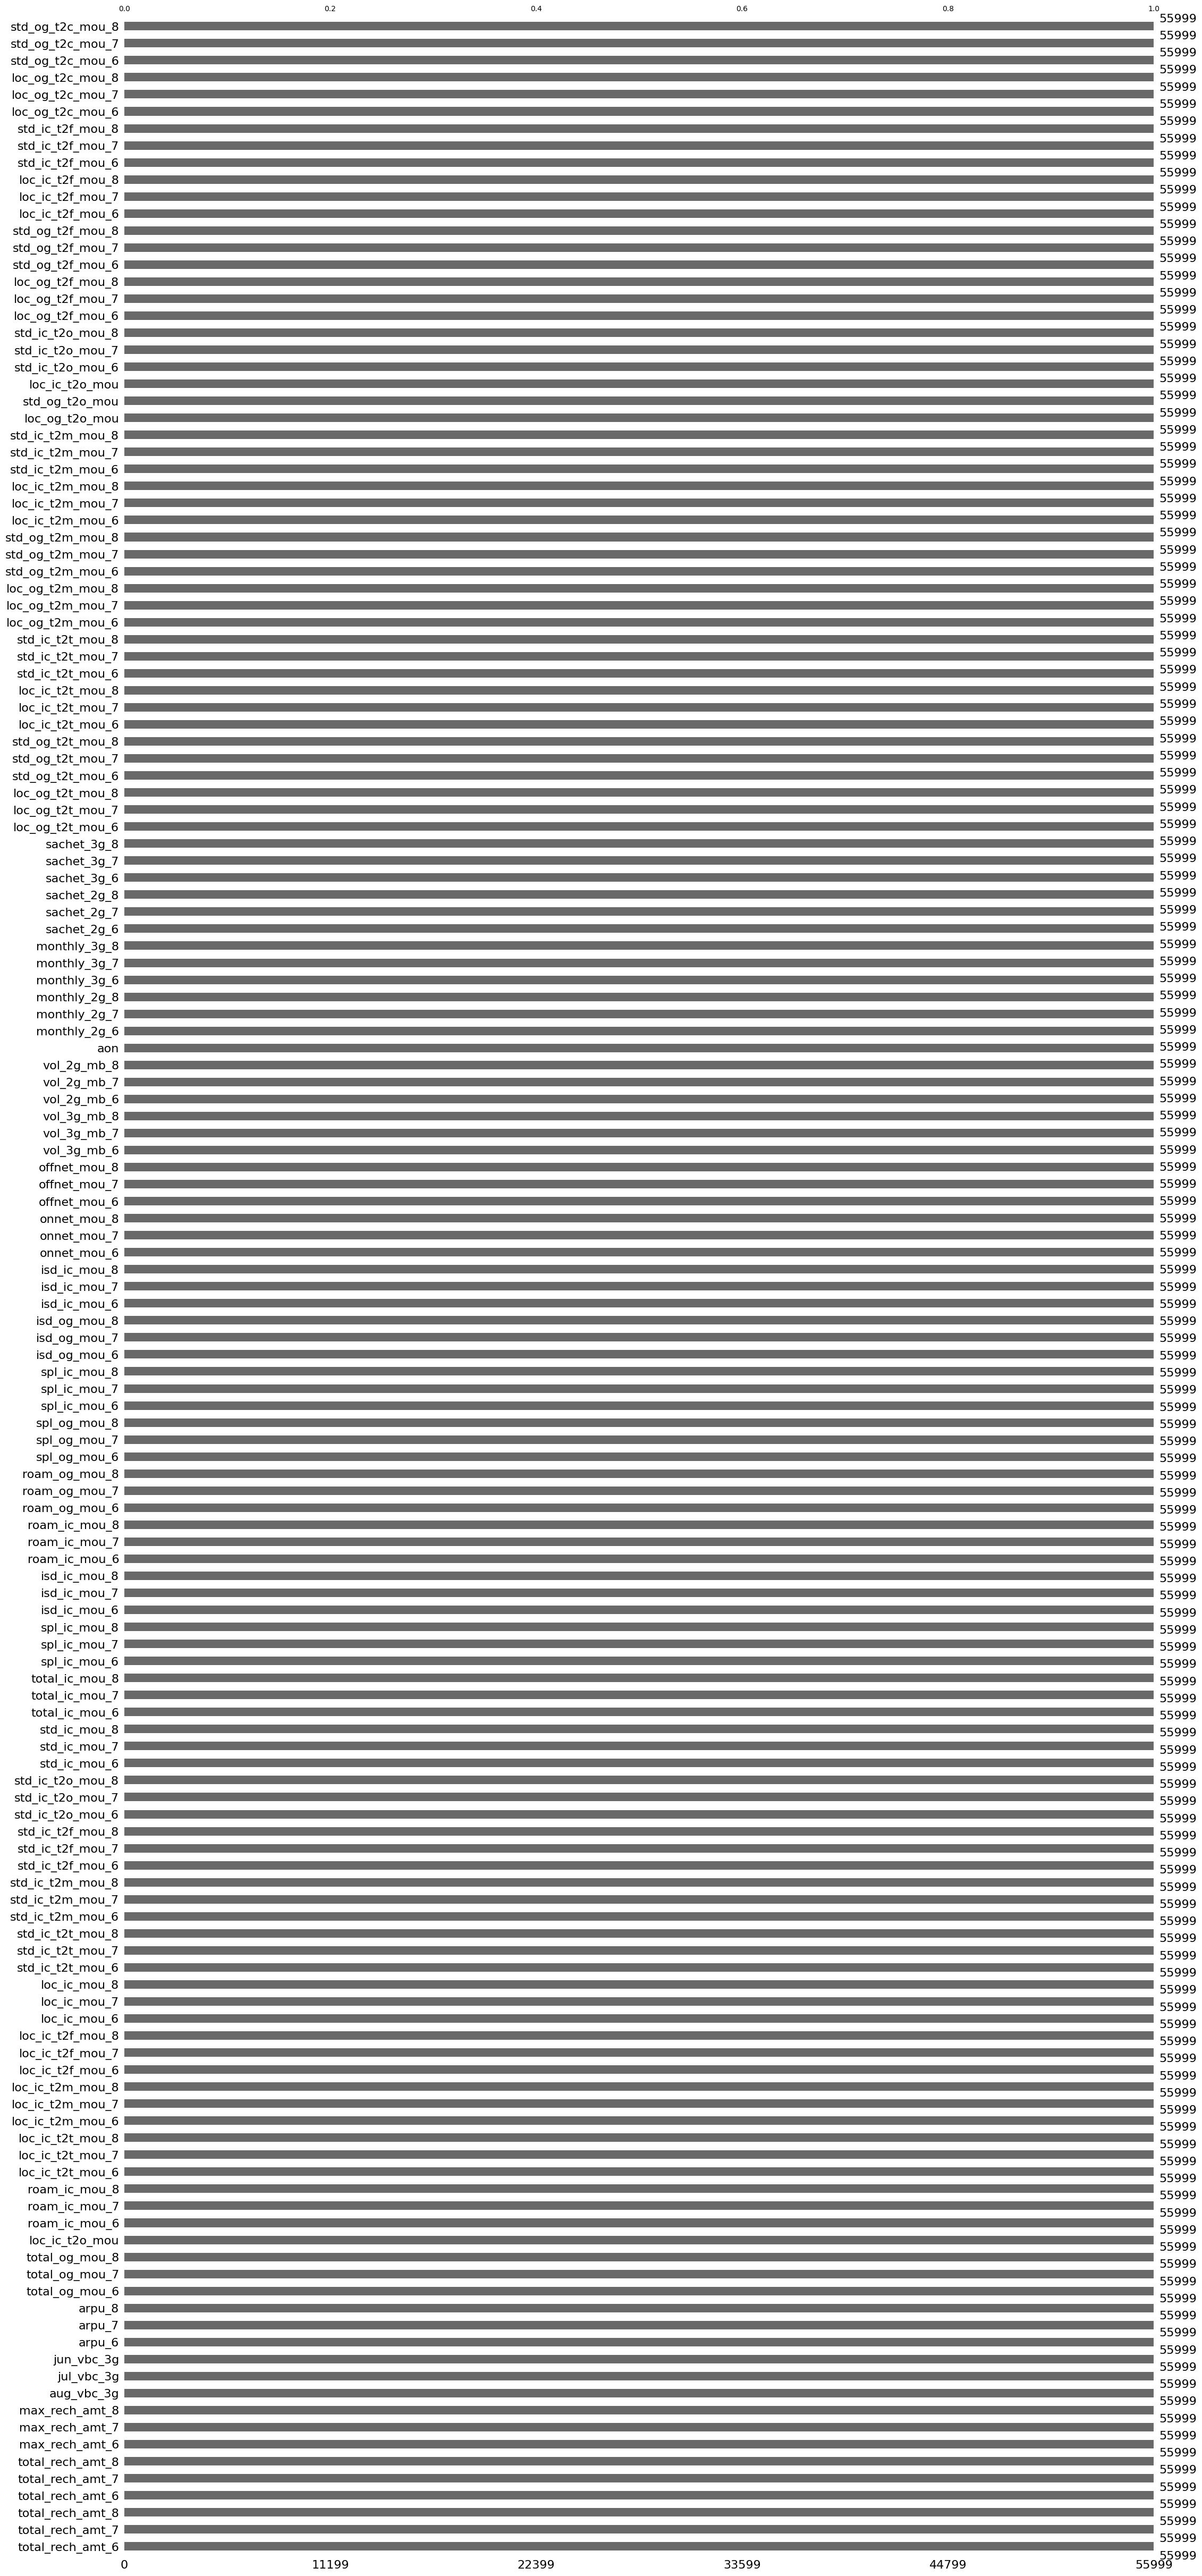

In [22]:
msno.bar(X_train_filtered)

In [23]:
X_train_filtered

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,aug_vbc_3g,...,loc_ic_t2f_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8
id,,,,,,,,,,,,,,,,,,,,,
47338,0,0,398,0,0,398,0,0,398,0.00,...,79.530000,0.0,0.00,0.000000,0.00,1.66,0.000000,0.0,0.0,0.0
67455,174,57,70,174,57,70,30,30,30,0.00,...,0.000000,0.0,0.73,0.000000,20.63,0.00,0.000000,0.0,0.0,0.0
12308,80,80,40,80,80,40,30,50,30,0.00,...,0.000000,0.0,3.95,0.000000,0.00,1.46,0.000000,0.0,0.0,0.0
52334,226,236,136,226,236,136,110,110,50,0.00,...,0.000000,0.0,0.00,0.000000,0.00,0.35,0.000000,0.0,0.0,0.0
664,660,110,0,660,110,0,110,110,0,0.00,...,11.775138,0.0,0.00,2.043191,0.00,0.00,1.421303,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,485,586,615,485,586,615,120,110,100,0.00,...,0.000000,0.0,0.00,0.000000,29.89,23.35,21.660000,0.0,0.0,0.0
6265,60,117,119,60,117,119,20,37,20,0.00,...,0.000000,0.0,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0
54886,333,154,333,333,154,333,179,154,179,1105.70,...,0.000000,0.0,1.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0


In [24]:
X_train_filtered.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,aug_vbc_3g,...,loc_ic_t2f_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,...,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.0,55999.0,55999.0
mean,328.232022,322.408525,323.104359,328.232022,322.408525,323.104359,104.461883,103.741870,107.294023,68.380316,...,11.775138,2.113729,2.209086,2.043191,1.135470,1.362516,1.421303,0.0,0.0,0.0
std,384.410291,379.638291,390.113575,384.410291,379.638291,390.113575,120.179522,118.655655,123.689147,269.928843,...,37.648495,16.083585,16.253685,15.330675,5.570395,8.080387,6.404508,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,110.000000,100.000000,91.000000,110.000000,100.000000,91.000000,30.000000,30.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,230.000000,220.000000,225.000000,230.000000,220.000000,225.000000,110.000000,110.000000,98.000000,0.000000,...,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,439.000000,430.000000,435.000000,439.000000,430.000000,435.000000,120.000000,128.000000,144.000000,0.000000,...,11.120000,0.000000,0.000000,0.160000,0.000000,0.000000,0.130000,0.0,0.0,0.0
max,17840.000000,16725.000000,20405.000000,17840.000000,16725.000000,20405.000000,4010.000000,3299.000000,4449.000000,12916.220000,...,1676.580000,1351.110000,1136.080000,1394.890000,336.130000,916.240000,351.830000,0.0,0.0,0.0


In [25]:
X_train_filtered.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Index: 55999 entries, 47338 to 15795
Data columns (total 149 columns):
 #    Column            Dtype  
---   ------            -----  
 0    total_rech_amt_6  int64  
 1    total_rech_amt_7  int64  
 2    total_rech_amt_8  int64  
 3    total_rech_amt_6  int64  
 4    total_rech_amt_7  int64  
 5    total_rech_amt_8  int64  
 6    max_rech_amt_6    int64  
 7    max_rech_amt_7    int64  
 8    max_rech_amt_8    int64  
 9    aug_vbc_3g        float64
 10   jul_vbc_3g        float64
 11   jun_vbc_3g        float64
 12   arpu_6            float64
 13   arpu_7            float64
 14   arpu_8            float64
 15   total_og_mou_6    float64
 16   total_og_mou_7    float64
 17   total_og_mou_8    float64
 18   loc_ic_t2o_mou    float64
 19   roam_ic_mou_6     float64
 20   roam_ic_mou_7     float64
 21   roam_ic_mou_8     float64
 22   loc_ic_t2t_mou_6  float64
 23   loc_ic_t2t_mou_7  float64
 24   loc_ic_t2t_mou_8  float64
 25   loc_ic_t2m_mou_6  flo

In [26]:
X_train_filtered.drop(columns = ['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'], axis = 1, inplace = True)

In [27]:
X_train_filtered.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,aug_vbc_3g,...,std_og_t2f_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,...,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,328.232022,322.408525,323.104359,328.232022,322.408525,323.104359,104.461883,103.741870,107.294023,68.380316,...,1.044912,12.079676,12.619841,11.775138,2.113729,2.209086,2.043191,1.135470,1.362516,1.421303
std,384.410291,379.638291,390.113575,384.410291,379.638291,390.113575,120.179522,118.655655,123.689147,269.928843,...,7.299294,38.639562,43.037954,37.648495,16.083585,16.253685,15.330675,5.570395,8.080387,6.404508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,100.000000,91.000000,110.000000,100.000000,91.000000,30.000000,30.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230.000000,220.000000,225.000000,230.000000,220.000000,225.000000,110.000000,110.000000,98.000000,0.000000,...,0.000000,1.130000,1.150000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,439.000000,430.000000,435.000000,439.000000,430.000000,435.000000,120.000000,128.000000,144.000000,0.000000,...,0.000000,10.310000,10.340000,11.120000,0.000000,0.000000,0.160000,0.000000,0.000000,0.130000
max,17840.000000,16725.000000,20405.000000,17840.000000,16725.000000,20405.000000,4010.000000,3299.000000,4449.000000,12916.220000,...,317.740000,1872.340000,1983.010000,1676.580000,1351.110000,1136.080000,1394.890000,336.130000,916.240000,351.830000


In [28]:
scale = StandardScaler()
X_train_filtered1 = pd.DataFrame(scale.fit_transform(X_train_filtered))

## Handeling Outliers
Features show there a lot of outliers. These can be capped with k-sigma method.

In [29]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

<Axes: >

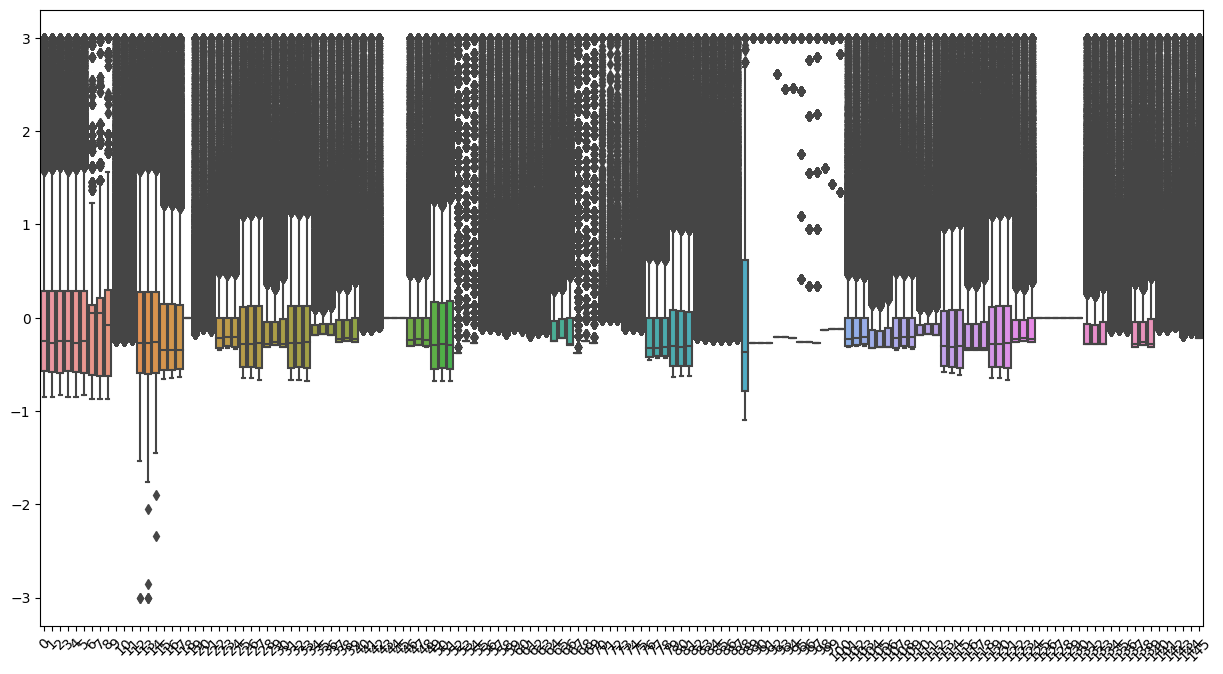

In [30]:
X_train_filtered2 = X_train_filtered1.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered2)

# 5. Feature engineering and selection

Let's understand feature importances for raw features as well as components to decide top features for modelling.

In [31]:
# Using Random Forest 

rf = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
rf.fit(X_train_filtered2, y_train)


RandomForestClassifier(n_jobs=-1)

In [32]:
feature_importances = pd.DataFrame({'col':X_train_filtered.columns, 'importance':rf.feature_importances_})

<BarContainer object of 146 artists>

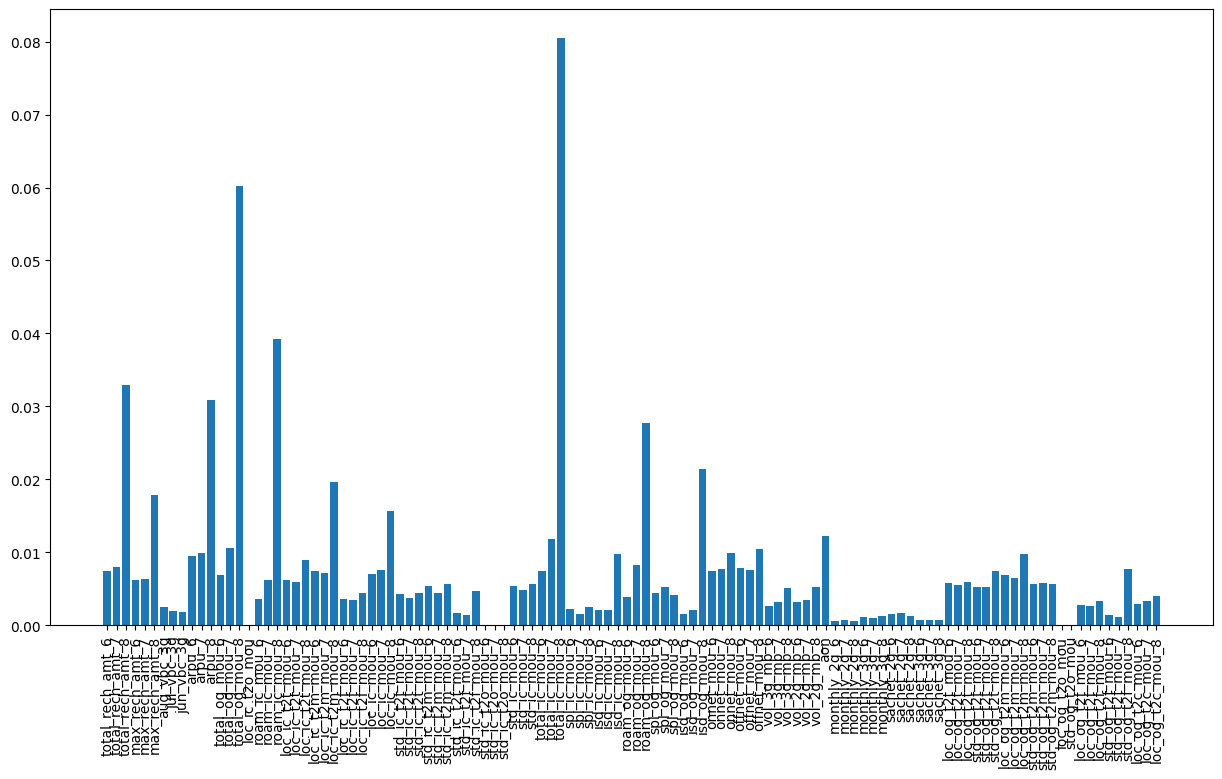

In [33]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.bar(feature_importances['col'],feature_importances['importance'])

### Using PCA 

<Axes: >

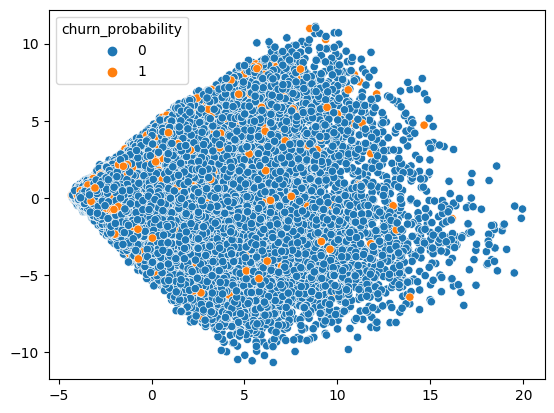

In [34]:
pca = PCA()
pca_components = pca.fit_transform(X_train_filtered2)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

In [35]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(16)], 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

ValueError: All arrays must be of the same length